Skrypt do krókiego porównania wyników eksperymentu A/B

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from collections import Counter

log = pd.read_csv('../microservice/ab_log.csv')
print(f"Załadowano {len(log)} interakcji")

Załadowano 58 interakcji


## Rozkład wariantów

Rozkład wariantów:
  Model A: 26 (44.8%)
  Model B: 32 (55.2%)


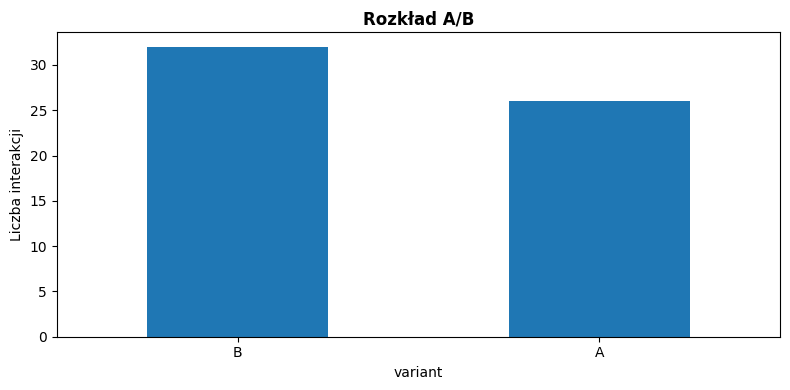

In [2]:
variant_counts = log['variant'].value_counts()
variant_pct = (variant_counts / len(log) * 100).round(1)

print("Rozkład wariantów:")
print(f"  Model A: {variant_counts.get('A', 0)} ({variant_pct.get('A', 0)}%)")
print(f"  Model B: {variant_counts.get('B', 0)} ({variant_pct.get('B', 0)}%)")

variant_counts.plot(kind='bar', figsize=(8, 4))
plt.title('Rozkład A/B', fontweight='bold')
plt.ylabel('Liczba interakcji')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Porównanie score

Średnie score:
           avg_top  avg_bottom
variant                       
A        20.358974    1.961538
B        47.343750  -11.500000


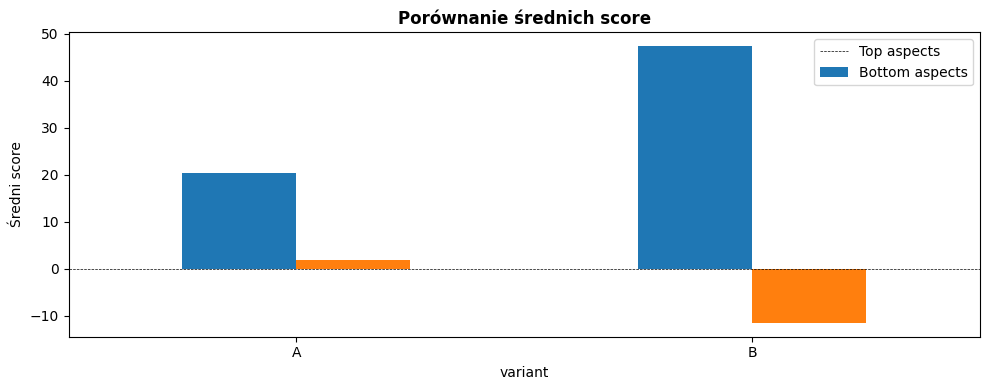

In [3]:
log['top_scores'] = log['top_scores'].apply(json.loads)
log['bottom_scores'] = log['bottom_scores'].apply(json.loads)
log['avg_top'] = log['top_scores'].apply(lambda x: sum(x)/len(x) if x else 0)
log['avg_bottom'] = log['bottom_scores'].apply(lambda x: sum(x)/len(x) if x else 0)

scores = log.groupby('variant')[['avg_top', 'avg_bottom']].mean()
print("Średnie score:")
print(scores)

scores.plot(kind='bar', figsize=(10, 4),)
plt.title('Porównanie średnich score', fontweight='bold')
plt.ylabel('Średni score')
plt.xticks(rotation=0)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(['Top aspects', 'Bottom aspects'])
plt.tight_layout()
plt.show()

## Najpopularniejsze aspekty

In [4]:
log['top_aspects'] = log['top_aspects'].apply(json.loads)

def count_aspects(variant):
    aspects = []
    for aspect_list in log[log['variant']==variant]['top_aspects']:
        aspects.extend(aspect_list)
    return Counter(aspects).most_common(5)

print("TOP 5 najczęstszych aspektów w top_aspects:")
print("\nModel A (Baseline):")
for aspect, count in count_aspects('A'):
    print(f"  {count:3d}x  {aspect}")

print("\nModel B (Advanced):")
for aspect, count in count_aspects('B'):
    print(f"  {count:3d}x  {aspect}")

TOP 5 najczęstszych aspektów w top_aspects:

Model A (Baseline):
   25x  overall_positive
   19x  cleanliness
    9x  host_communication
    6x  host_and_property
    5x  transport_connectivity

Model B (Advanced):
   26x  overall_positive
   26x  host_communication
   19x  apartment_quality
    7x  comprehensive_comments
    4x  apartment_amenities


## Konsystencja przypisania

In [5]:
consistency = log.groupby('listing_id')['variant'].nunique()
inconsistent = consistency[consistency > 1]

if len(inconsistent) == 0:
    print("Wszystkie listingi mają konsystentny wariant")
else:
    print(f"{len(inconsistent)} listingów ma różne warianty")
    print(inconsistent)

Wszystkie listingi mają konsystentny wariant
